In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv('/content/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


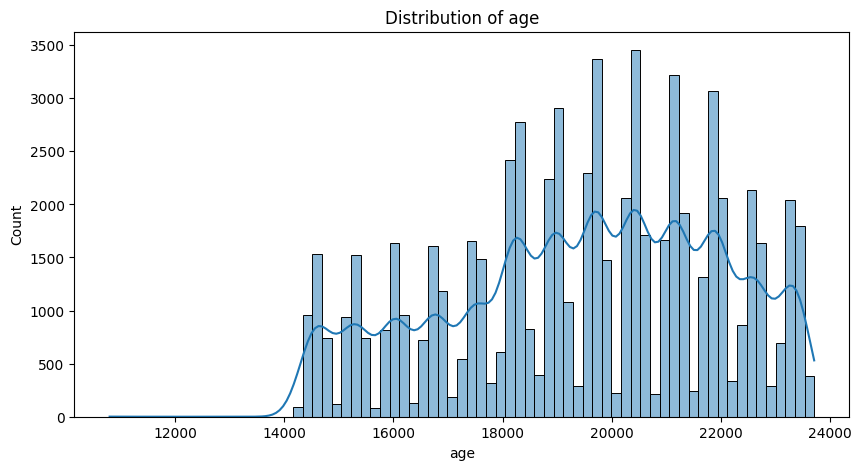

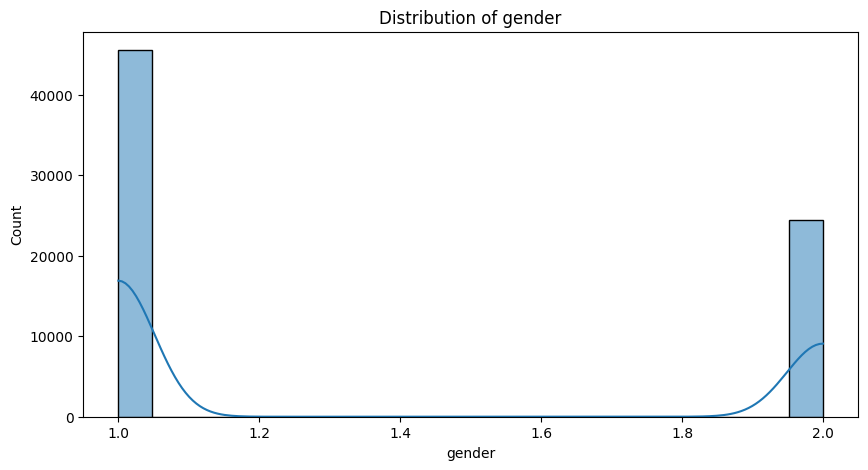

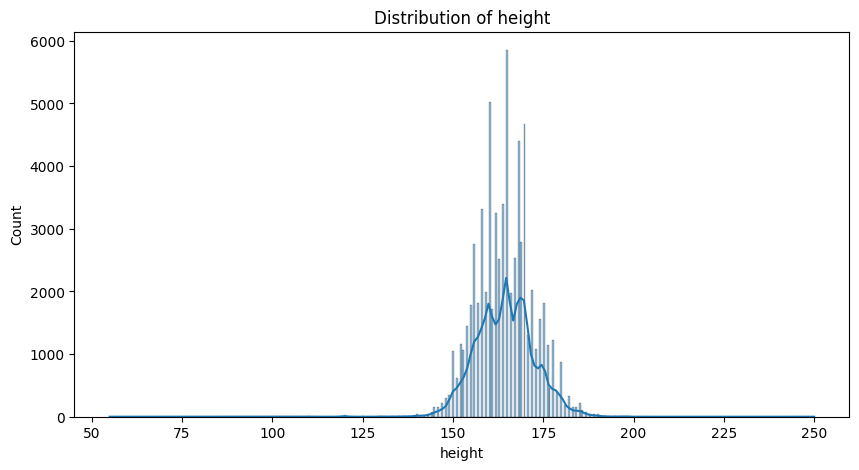

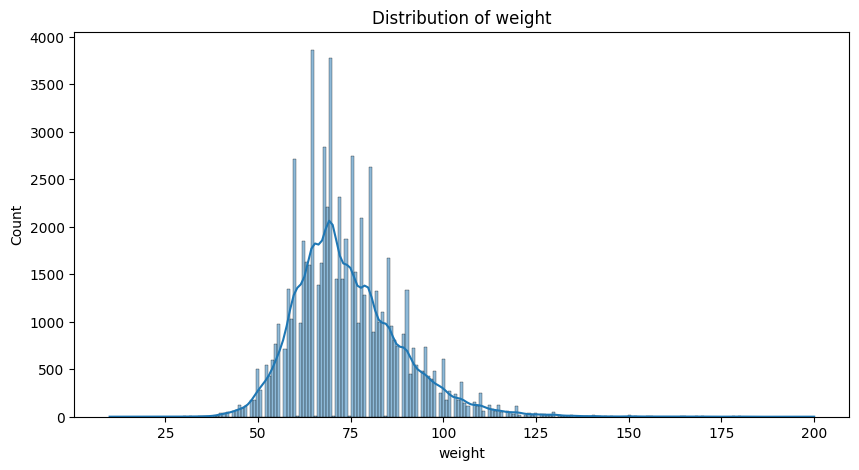

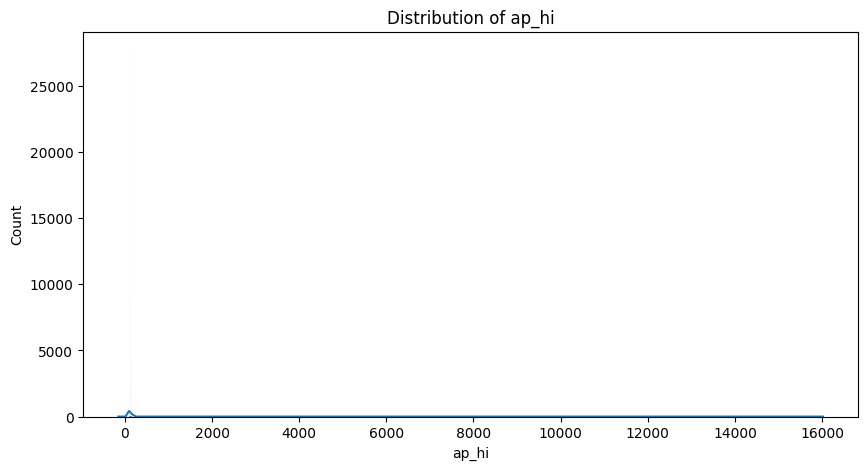

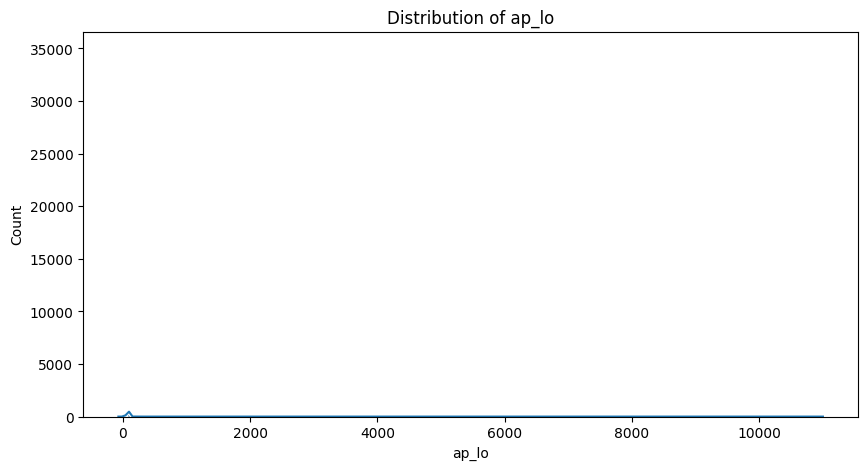

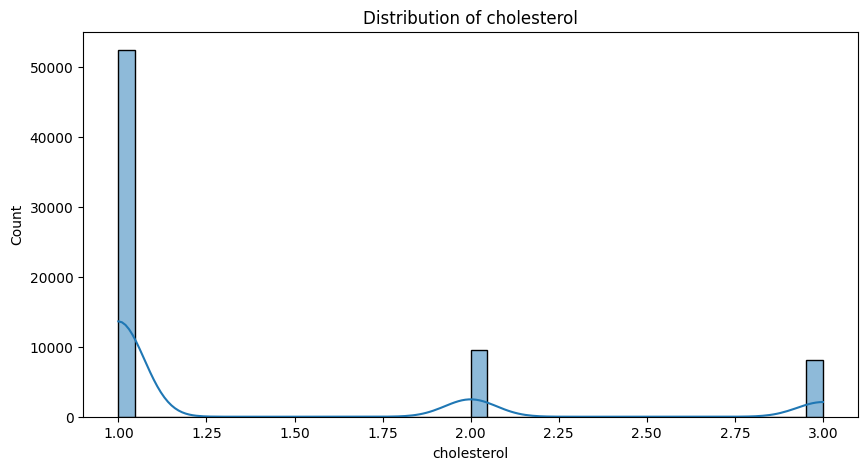

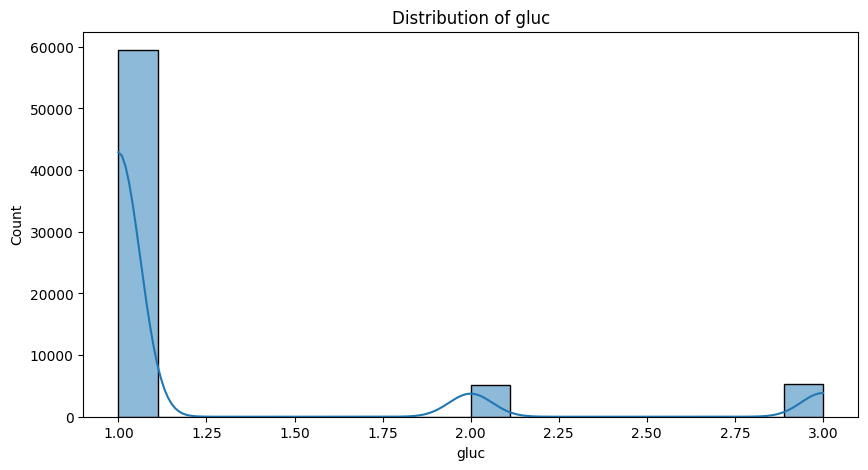

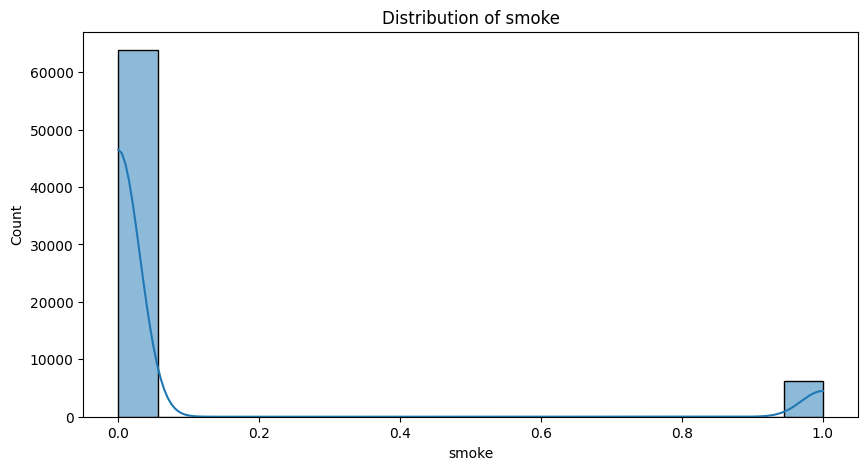

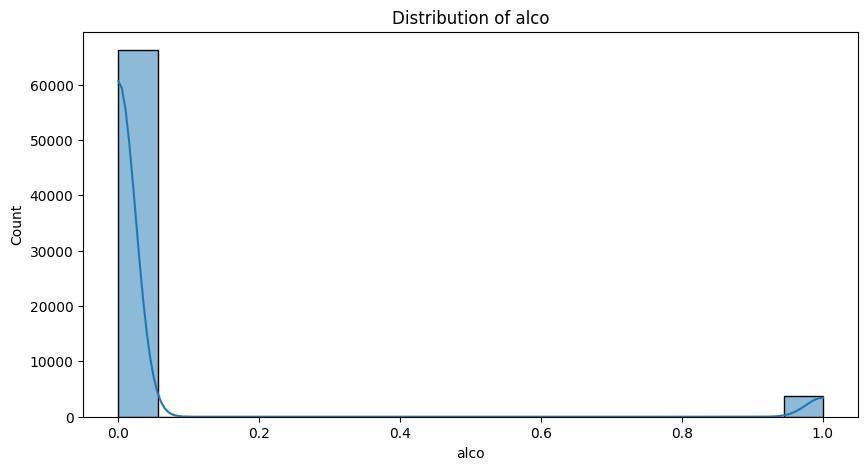

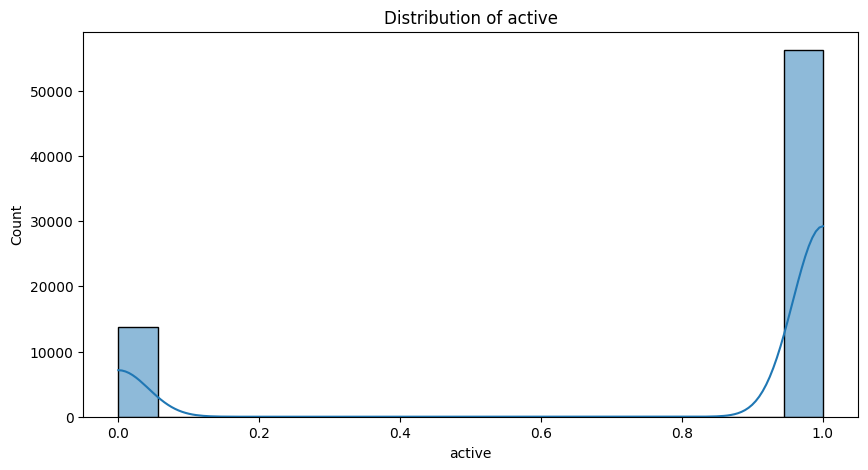

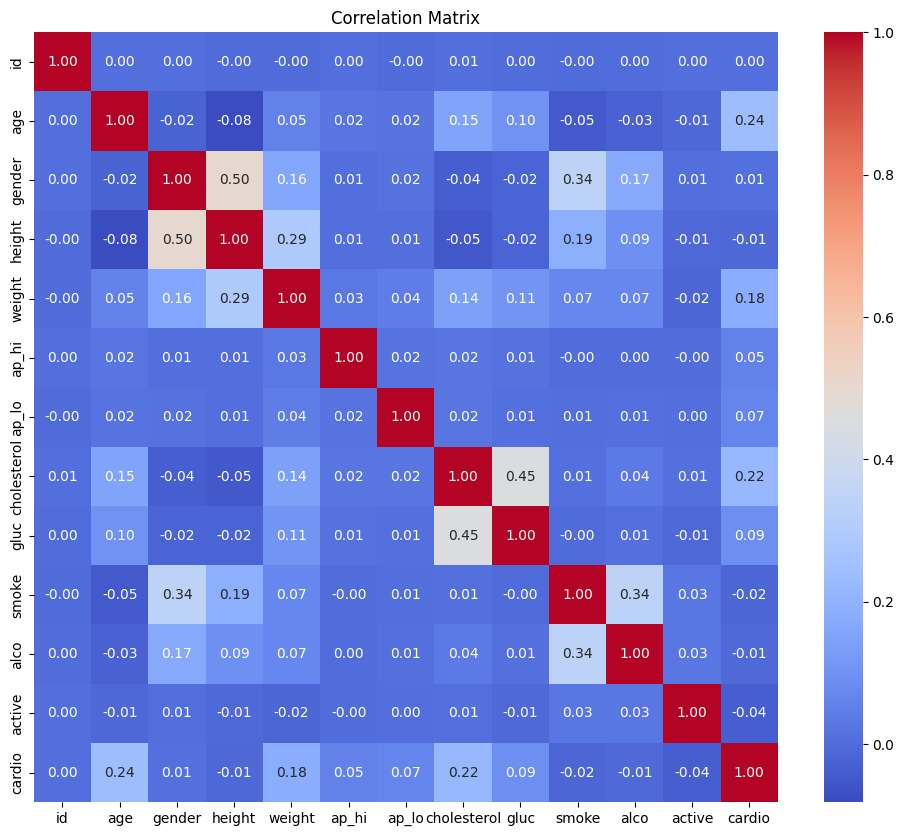

In [2]:
# Distribution of each feature
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [3]:
# Data preprocessing
df['age'] = df['age'] / 365.25

# Features and target
X = df.drop(columns=['id', 'cardio'])
y = df['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

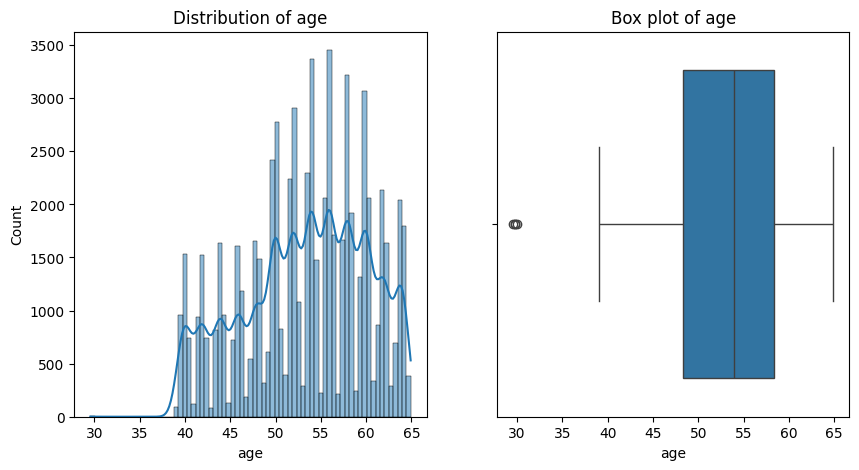

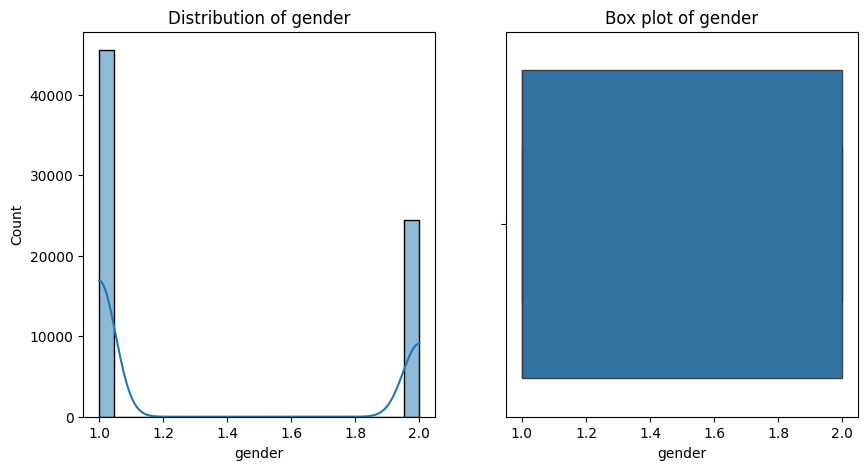

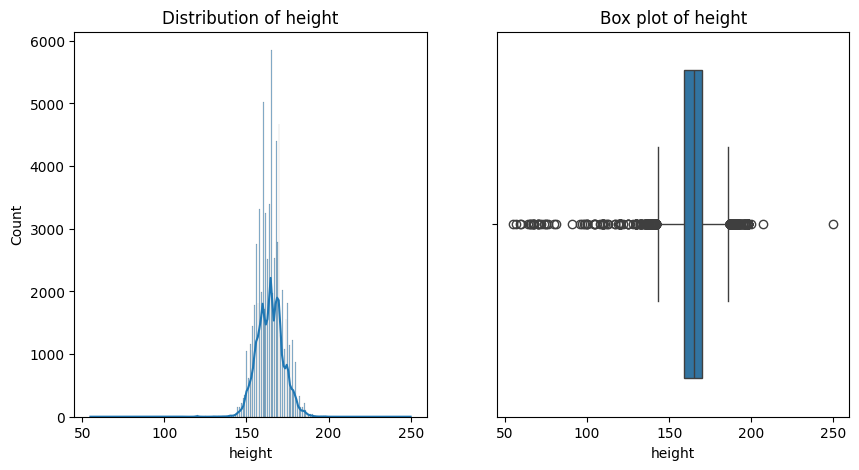

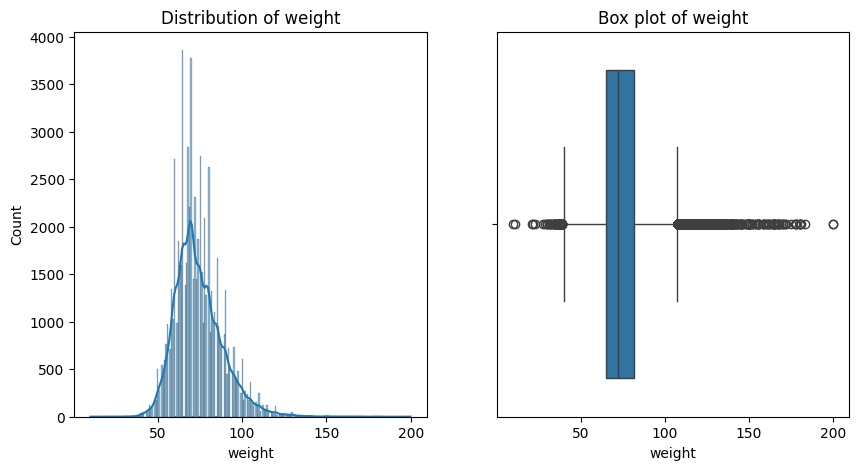

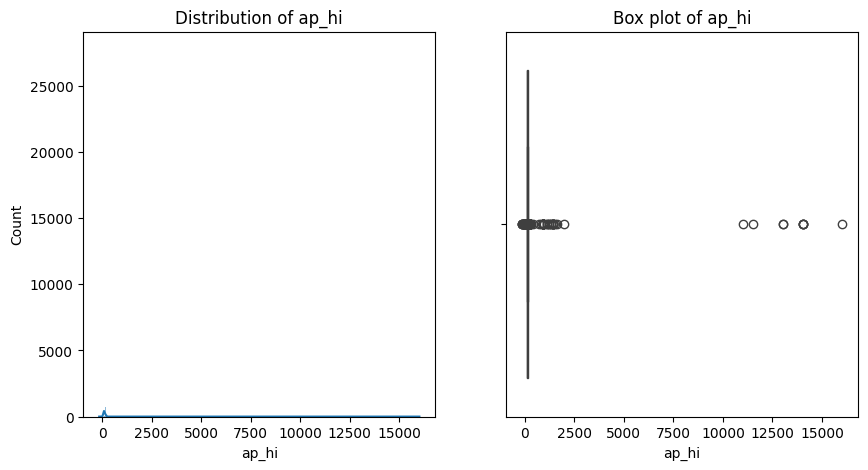

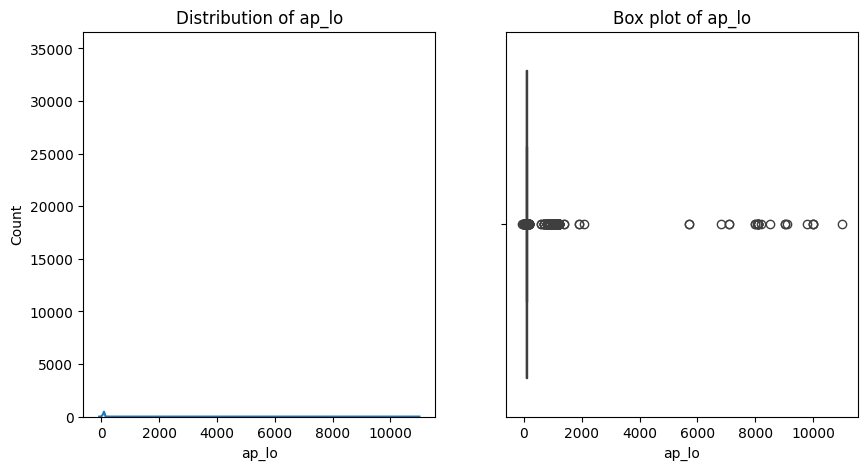

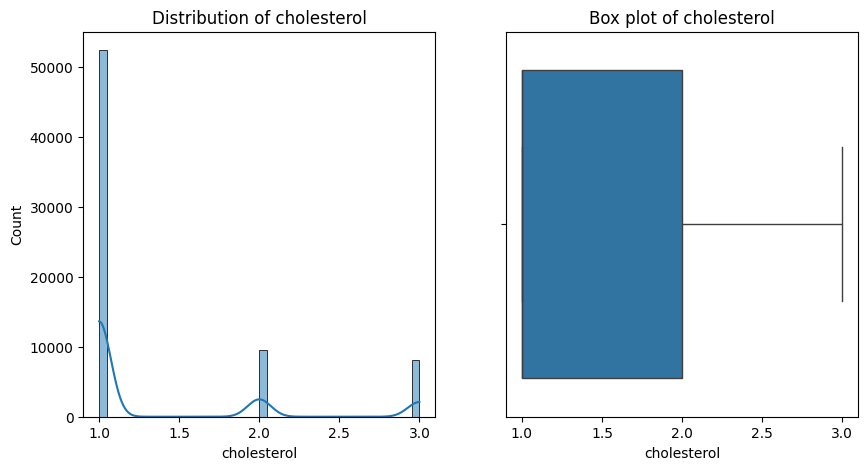

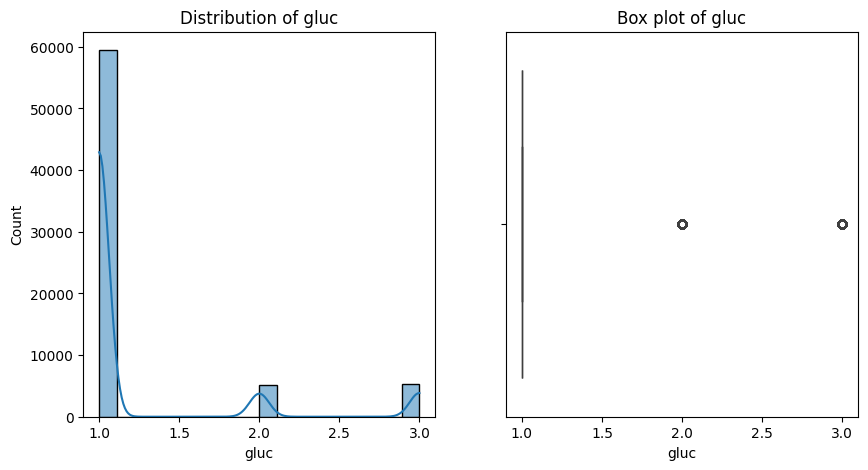

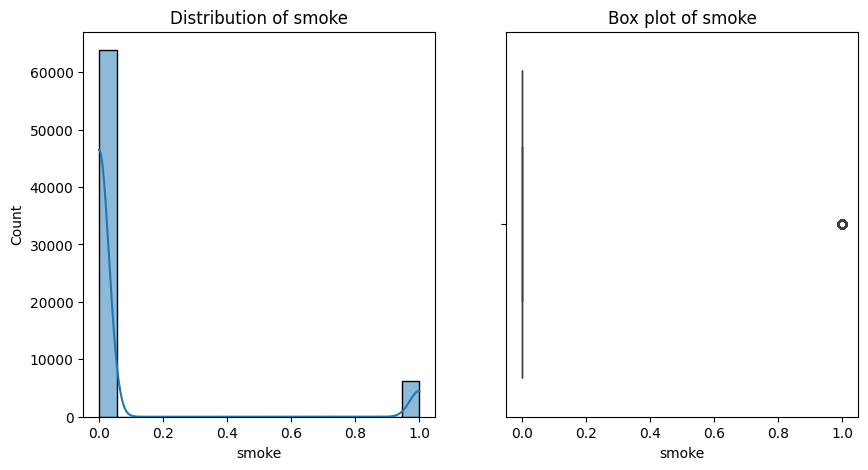

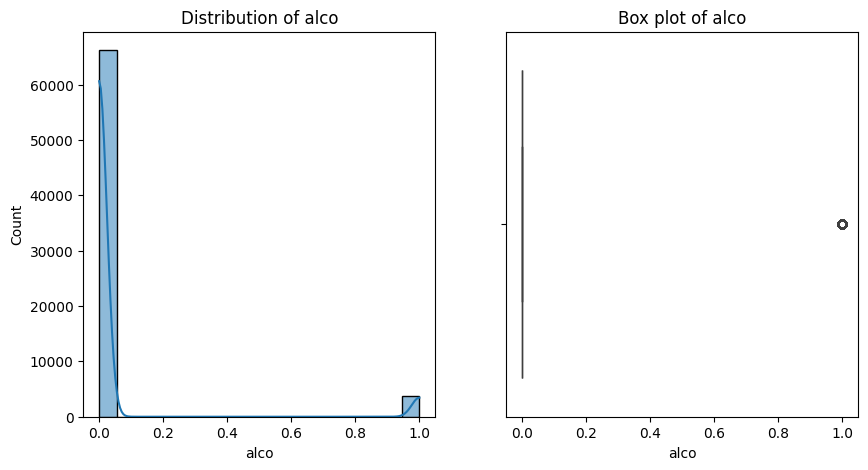

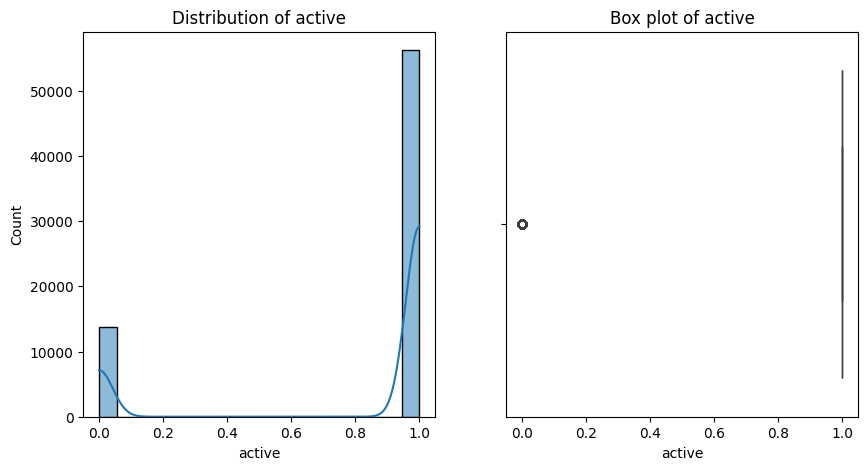

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution and box plots for each feature
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for feature in features:
    plt.figure(figsize=(10, 5))

    # Histogram and KDE plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')

    plt.show()


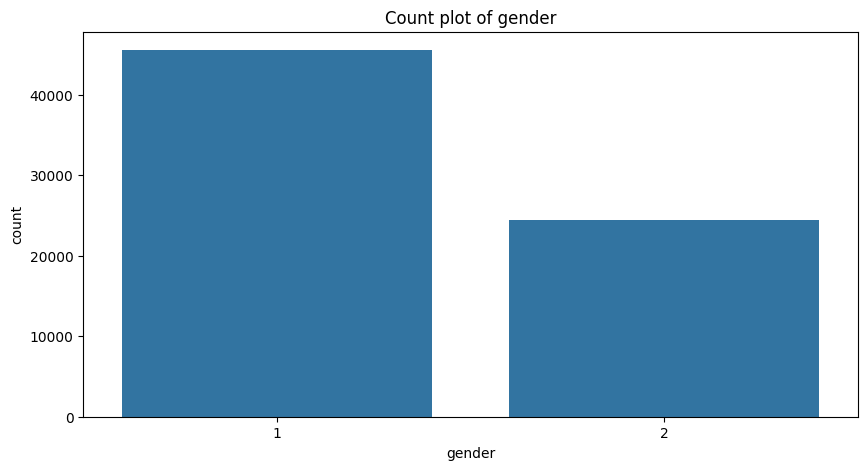

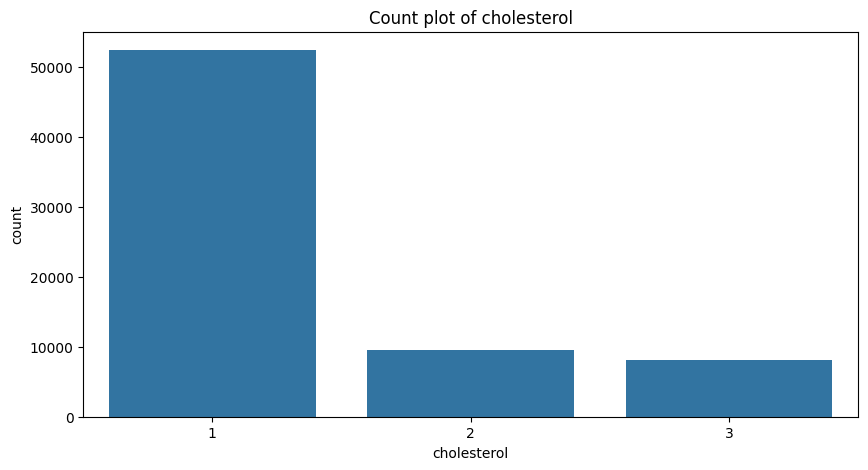

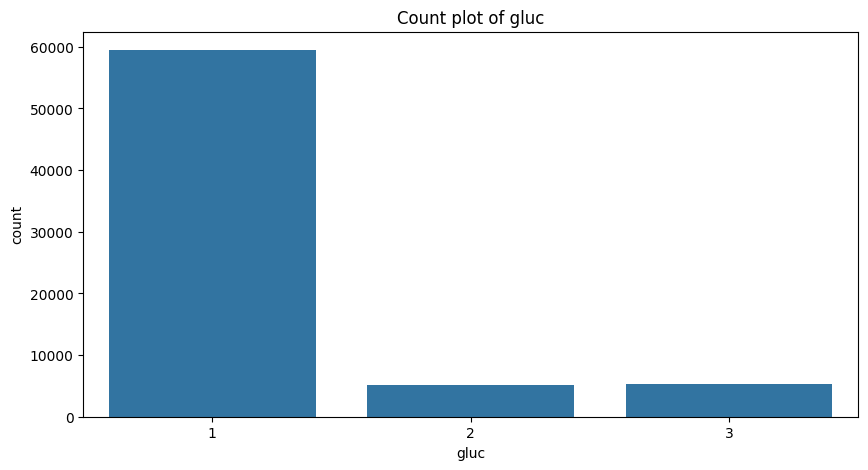

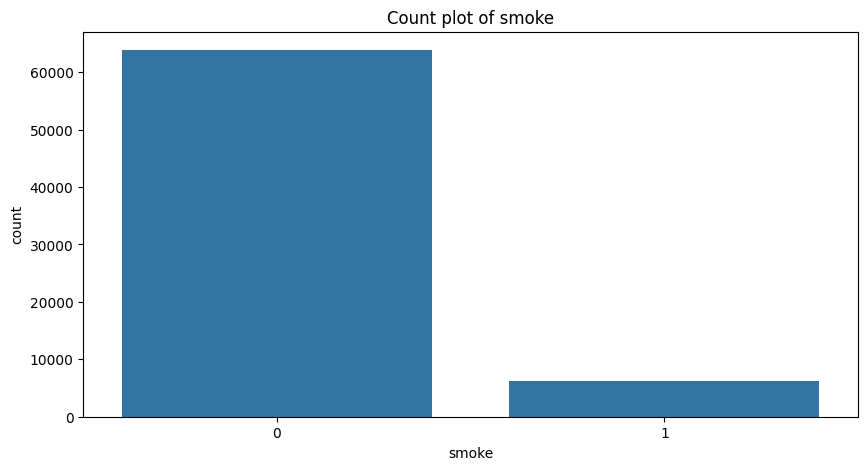

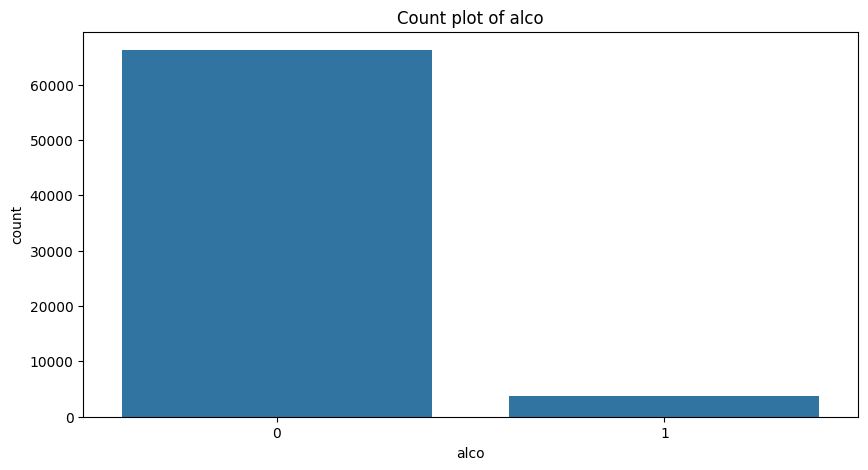

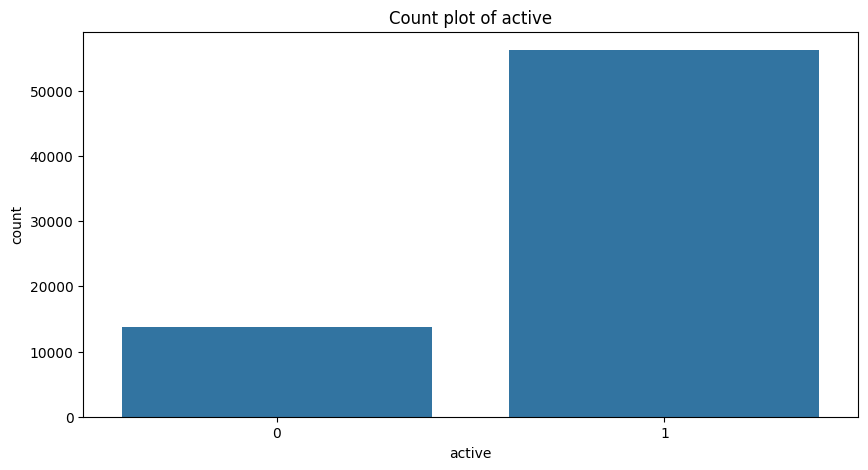

In [5]:
# Bar plots for categorical features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[feature])
    plt.title(f'Count plot of {feature}')
    plt.show()

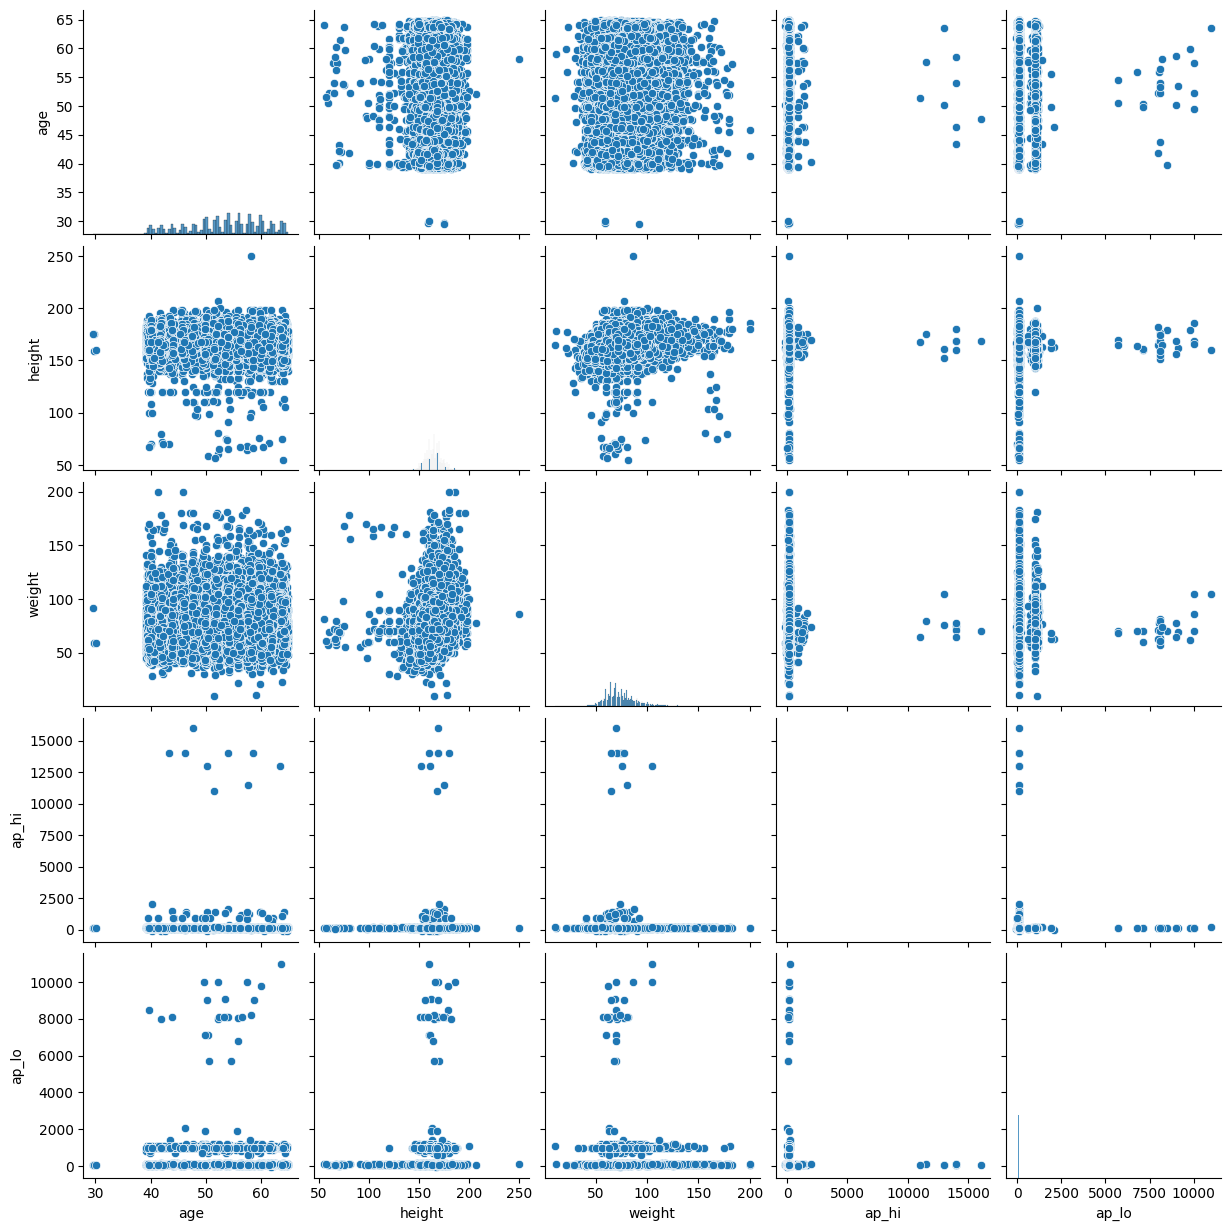

In [6]:
# Pair plots for continuous features
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
sns.pairplot(df[continuous_features])
plt.show()

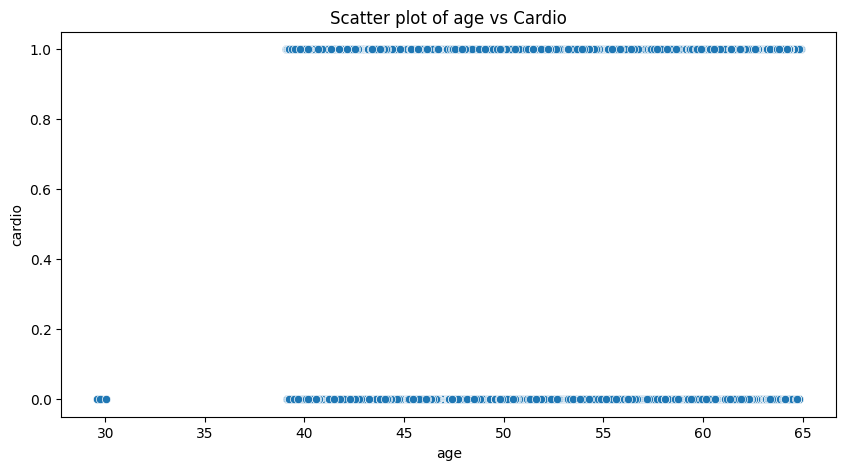

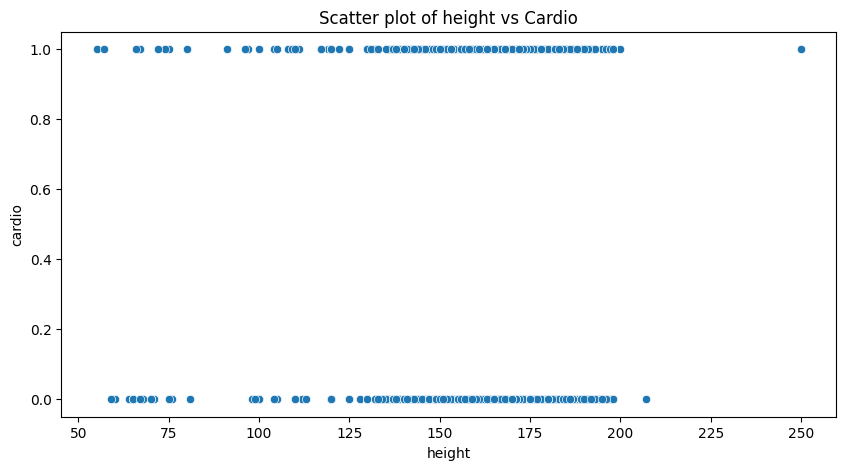

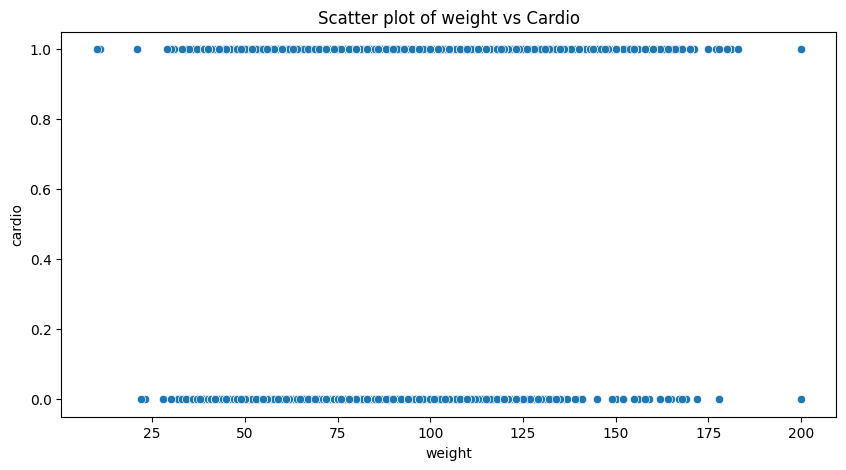

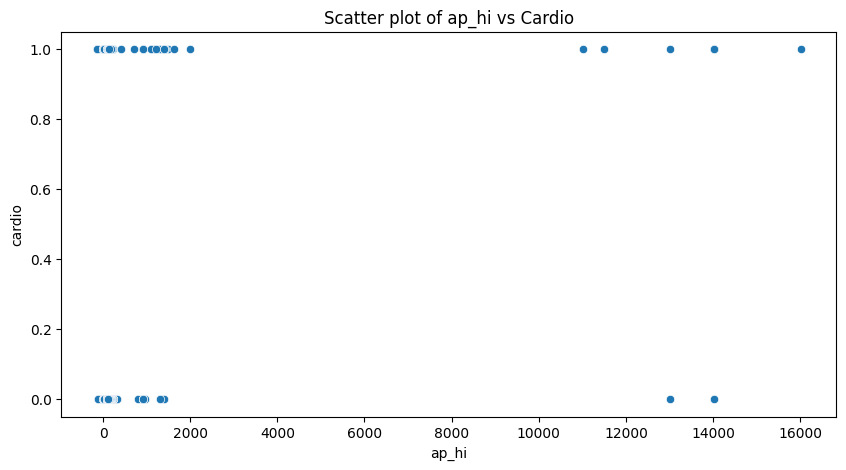

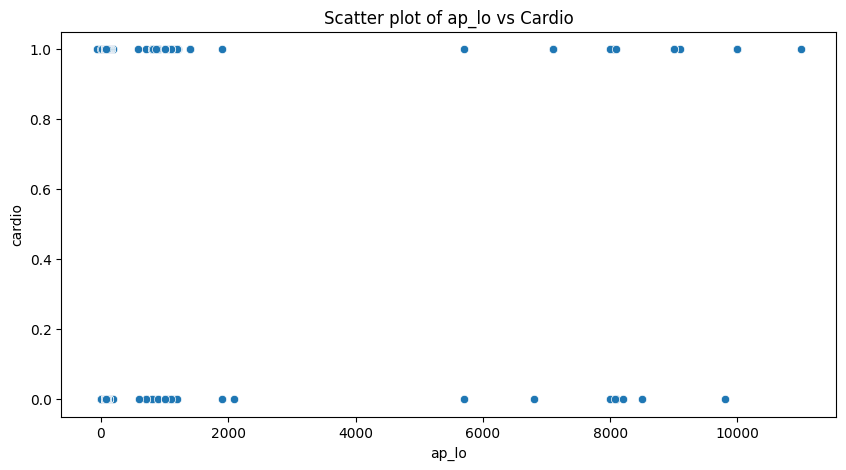

In [7]:
# Scatter plots to see relationship with target variable
for feature in continuous_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df[feature], y=df['cardio'])
    plt.title(f'Scatter plot of {feature} vs Cardio')
    plt.show()

In [8]:
# Normal Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.7199047619047619
[[7965 2496]
 [3386 7153]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [9]:
# Fine-tuned Logistic Regression
param_grid_logistic = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)
best_logistic_model = grid_search_logistic.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_logistic.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_logistic.best_score_}")

y_pred_best_logistic = best_logistic_model.predict(X_test)
accuracy_best_logistic = accuracy_score(y_test, y_pred_best_logistic)
print(f"Fine-tuned Logistic Regression Accuracy: {accuracy_best_logistic}")
print(confusion_matrix(y_test, y_pred_best_logistic))
print(classification_report(y_test, y_pred_best_logistic))

Best parameters for Logistic Regression: {'C': 10}
Best score for Logistic Regression: 0.7163469387755101
Fine-tuned Logistic Regression Accuracy: 0.7203333333333334
[[7973 2488]
 [3385 7154]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [10]:
# Normal Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.6347142857142857
[[6558 3903]
 [3768 6771]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.63     10461
           1       0.63      0.64      0.64     10539

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



In [11]:
# Fine-tuned Decision Tree
param_grid_tree = {'max_depth': [3, 5, 7, 10]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
best_tree_model = grid_search_tree.best_estimator_
print(f"Best parameters for Decision Tree: {grid_search_tree.best_params_}")
print(f"Best score for Decision Tree: {grid_search_tree.best_score_}")

y_pred_best_tree = best_tree_model.predict(X_test)
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
print(f"Fine-tuned Decision Tree Accuracy: {accuracy_best_tree}")
print(confusion_matrix(y_test, y_pred_best_tree))
print(classification_report(y_test, y_pred_best_tree))

Best parameters for Decision Tree: {'max_depth': 7}
Best score for Decision Tree: 0.7291632653061224
Fine-tuned Decision Tree Accuracy: 0.7330952380952381
[[7922 2539]
 [3066 7473]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10461
           1       0.75      0.71      0.73     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [12]:
# Normal Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest}")
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.716952380952381
[[7612 2849]
 [3095 7444]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10461
           1       0.72      0.71      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [13]:
# Fine-tuned Random Forest
param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
grid_search_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5, scoring='accuracy')
grid_search_forest.fit(X_train, y_train)
best_forest_model = grid_search_forest.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_forest.best_params_}")
print(f"Best score for Random Forest: {grid_search_forest.best_score_}")

y_pred_best_forest = best_forest_model.predict(X_test)
accuracy_best_forest = accuracy_score(y_test, y_pred_best_forest)
print(f"Fine-tuned Random Forest Accuracy: {accuracy_best_forest}")
print(confusion_matrix(y_test, y_pred_best_forest))
print(classification_report(y_test, y_pred_best_forest))

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best score for Random Forest: 0.7338367346938777
Fine-tuned Random Forest Accuracy: 0.7394285714285714
[[8324 2137]
 [3335 7204]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10461
           1       0.77      0.68      0.72     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



In [14]:
# Normal Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7376666666666667
[[8030 2431]
 [3078 7461]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10461
           1       0.75      0.71      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



In [15]:
# Fine-tuned Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best score for Gradient Boosting: {grid_search_gb.best_score_}")

y_pred_best_gb = best_gb_model.predict(X_test)
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print(f"Fine-tuned Gradient Boosting Accuracy: {accuracy_best_gb}")
print(confusion_matrix(y_test, y_pred_best_gb))
print(classification_report(y_test, y_pred_best_gb))

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'n_estimators': 50}
Best score for Gradient Boosting: 0.7338163265306122
Fine-tuned Gradient Boosting Accuracy: 0.7393333333333333
[[8059 2402]
 [3072 7467]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     10461
           1       0.76      0.71      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



In [16]:
# Normal XGBoost
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7339523809523809
[[8096 2365]
 [3222 7317]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10461
           1       0.76      0.69      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



In [17]:
# Fine-tuned XGBoost
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")

y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Fine-tuned XGBoost Accuracy: {accuracy_best_xgb}")
print(confusion_matrix(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))

Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Best score for XGBoost: 0.7342244897959184
Fine-tuned XGBoost Accuracy: 0.7390476190476191
[[8168 2293]
 [3187 7352]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10461
           1       0.76      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



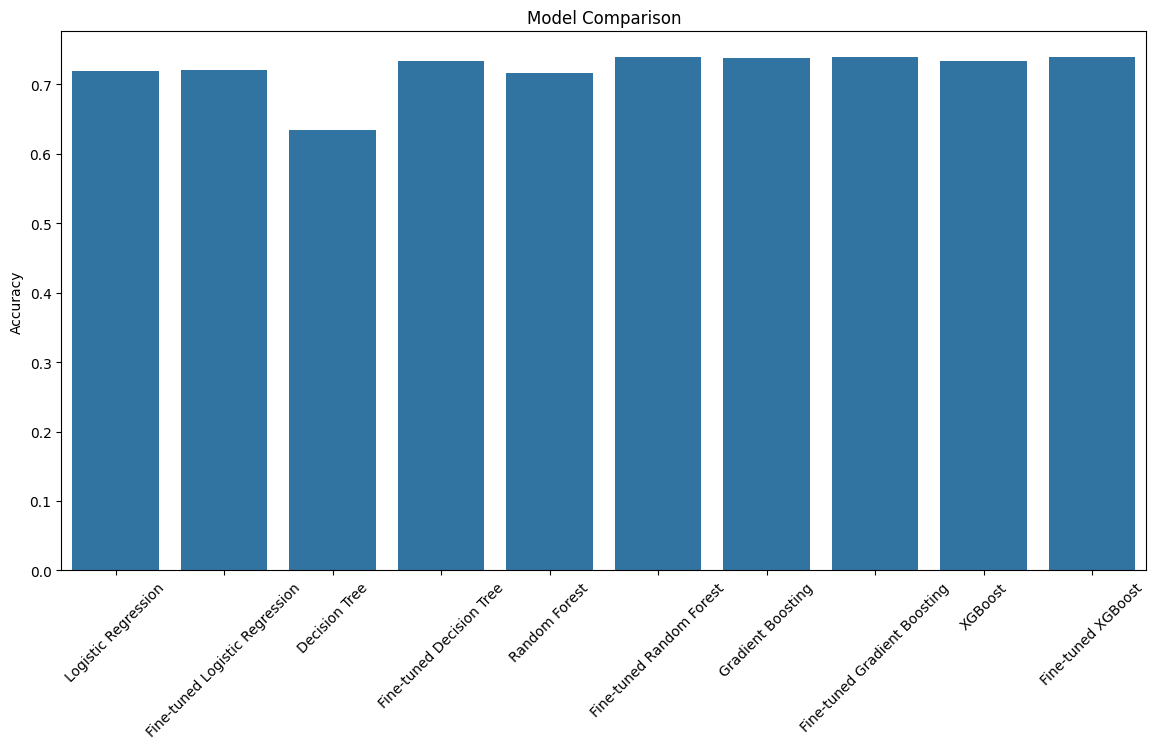

In [18]:
# Collecting the accuracy of all models for comparison
results = {
    'Logistic Regression': accuracy_logistic,
    'Fine-tuned Logistic Regression': accuracy_best_logistic,
    'Decision Tree': accuracy_tree,
    'Fine-tuned Decision Tree': accuracy_best_tree,
    'Random Forest': accuracy_forest,
    'Fine-tuned Random Forest': accuracy_best_forest,
    'Gradient Boosting': accuracy_gb,
    'Fine-tuned Gradient Boosting': accuracy_best_gb,
    'XGBoost': accuracy_xgb,
    'Fine-tuned XGBoost': accuracy_best_xgb
}

# Plotting the comparison
plt.figure(figsize=(14, 7))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()